In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from typing import List
import itertools

# Load data

In [2]:
building_data_full = pd.read_parquet("/Users/adrian/Library/Mobile Documents/com~apple~CloudDocs/Documents/ICAI/TFG/Code/data/consumption/MA_baseline_metadata_and_annual_results.parquet")
# building_data_full = building_data_full[building_data_full["in.county"] == "G2500170"]

In [40]:
building_data_full["in.cooling_setpoint"]

bldg_id
10        65F
122       70F
129       75F
150       68F
183       80F
         ... 
549732    72F
549816    75F
549871    72F
549954    70F
549997    60F
Name: in.cooling_setpoint, Length: 11707, dtype: string

In [41]:
building_data_full["in.cooling_setpoint_offset_period"]

bldg_id
10                     None
122                    None
129                    None
150                    None
183       Night Setback -5h
                ...        
549732                 None
549816                 None
549871    Night Setback -2h
549954                 None
549997                 None
Name: in.cooling_setpoint_offset_period, Length: 11707, dtype: string

In [36]:
building_data_full["in.heating_setpoint"]

bldg_id
10        67F
122       72F
129       75F
150       67F
183       72F
         ... 
549732    68F
549816    70F
549871    65F
549954    67F
549997    72F
Name: in.heating_setpoint, Length: 11707, dtype: string

In [37]:
building_data_full["in.heating_setpoint_offset_period"]

bldg_id
10                     None
122                    None
129                    None
150               Night -2h
183                    None
                ...        
549732    Day and Night +1h
549816            Night -2h
549871                 None
549954                 None
549997            Night +2h
Name: in.heating_setpoint_offset_period, Length: 11707, dtype: string

In [38]:
building_data_full["in.heating_setpoint_offset_magnitude"]

bldg_id
10         0F
122        0F
129        0F
150       12F
183        0F
         ... 
549732     3F
549816     3F
549871     0F
549954     0F
549997     3F
Name: in.heating_setpoint_offset_magnitude, Length: 11707, dtype: string

In [ ]:
building_data_full["heating"]

bldg_id
10          0.0
122        43.5
129       64.75
150       37.25
183         0.0
          ...  
549732    12.25
549816    26.75
549871     9.75
549954    10.75
549997     3.25
Name: out.unmet_hours.heating.hour, Length: 11707, dtype: double[pyarrow]

In [3]:
weather_data = pd.read_csv("/Users/adrian/Library/Mobile Documents/com~apple~CloudDocs/Documents/ICAI/TFG/Code/data/consumption/G2500170_2018.csv")

In [4]:
def get_idx_from_path(path: str) -> int:
    idx = path.split("/")[-1].split("_")[0]
    # Remove .parquet from the end
    idx = idx[:-10]
    return int(idx)

In [5]:
paths = [
    "/Users/adrian/Library/Mobile Documents/com~apple~CloudDocs/Documents/ICAI/TFG/Code/data/consumption/10-0.parquet",
    "/Users/adrian/Library/Mobile Documents/com~apple~CloudDocs/Documents/ICAI/TFG/Code/data/consumption/1000-0.parquet",
    "/Users/adrian/Library/Mobile Documents/com~apple~CloudDocs/Documents/ICAI/TFG/Code/data/consumption/10004-0.parquet",
    "/Users/adrian/Library/Mobile Documents/com~apple~CloudDocs/Documents/ICAI/TFG/Code/data/consumption/100001-0.parquet",
    "/Users/adrian/Library/Mobile Documents/com~apple~CloudDocs/Documents/ICAI/TFG/Code/data/consumption/100061-0.parquet",
]

data_dict = {}
idxs = {}

i = 1
for path in paths:
    building_timeseries = pd.read_parquet(path)

    # Parse dates
    building_timeseries['date'] = pd.to_datetime(building_timeseries['timestamp'])
    building_timeseries = building_timeseries.set_index('date')

    data_dict[i] = building_timeseries
    idxs[i] = get_idx_from_path(path)
    i += 1

In [6]:
data_dict[1].head()

,timestamp,out.electricity.ceiling_fan.energy_consumption,out.electricity.ceiling_fan.energy_consumption_intensity,out.electricity.clothes_dryer.energy_consumption,out.electricity.clothes_dryer.energy_consumption_intensity,out.electricity.clothes_washer.energy_consumption,out.electricity.clothes_washer.energy_consumption_intensity,out.electricity.cooling.energy_consumption,out.electricity.cooling.energy_consumption_intensity,out.electricity.cooling_fans_pumps.energy_consumption,...,out.total.lrmer_midcase_15__electricity.co2e_kg,out.total.lrmer_midcase_15__fuel_oil.co2e_kg,out.total.lrmer_midcase_15__natural_gas.co2e_kg,out.total.lrmer_midcase_15__propane.co2e_kg,out.total.lrmer_midcase_15.co2e_kg,out.total.lrmer_midcase_25__electricity.co2e_kg,out.total.lrmer_midcase_25__fuel_oil.co2e_kg,out.total.lrmer_midcase_25__natural_gas.co2e_kg,out.total.lrmer_midcase_25__propane.co2e_kg,out.total.lrmer_midcase_25.co2e_kg
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,2018-01-01 00:15:00,0.001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048430,1.378785,0.0,0.0,1.427215,0.046058,1.378785,0.0,0.0,1.424842
2018-01-01 00:30:00,2018-01-01 00:30:00,0.002,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049319,1.370493,0.0,0.0,1.419812,0.046906,1.370493,0.0,0.0,1.417399
2018-01-01 00:45:00,2018-01-01 00:45:00,0.002,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049138,1.362687,0.0,0.0,1.411824,0.046734,1.362687,0.0,0.0,1.409420
2018-01-01 01:00:00,2018-01-01 01:00:00,0.001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048076,1.363626,0.0,0.0,1.411706,0.045727,1.363626,0.0,0.0,1.409352
2018-01-01 01:15:00,2018-01-01 01:15:00,0.001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046507,1.363685,0.0,0.0,1.410191,0.043908,1.363685,0.0,0.0,1.407592


In [7]:
idxs

{1: 10, 2: 1000, 3: 10004, 4: 100001, 5: 100061}

# Transform data

In [8]:
def get_cols(building_data: pd.DataFrame, building_id: int) -> str:

    try:
        building = building_data.loc[building_id]
    except:
        raise ValueError("Building ID not found in the dataset")
    
    print(building["in.heating_fuel"])

    match building["in.heating_fuel"]:
        case  "Natural Gas":
            return "out.natural_gas.heating.energy_consumption"
        case "Electricity":
            return "out.electricity.heating.energy_consumption"
        case "Fuel Oil":
            return "out.fuel_oil.heating.energy_consumption"
        case "Propane":
            return "out.propane.heating.energy_consumption"
        case _:
            return "out.electricity.heating.energy_consumption"

In [9]:
for num in data_dict:
    building_timeseries = data_dict[num]
    cols_to_include = get_cols(building_data_full, idxs[num])
    building_timeseries = building_timeseries[cols_to_include]
    building_timeseries = building_timeseries.iloc[3:]
    data_dict[num] = building_timeseries

Fuel Oil
Natural Gas
Electricity
Natural Gas
Electricity


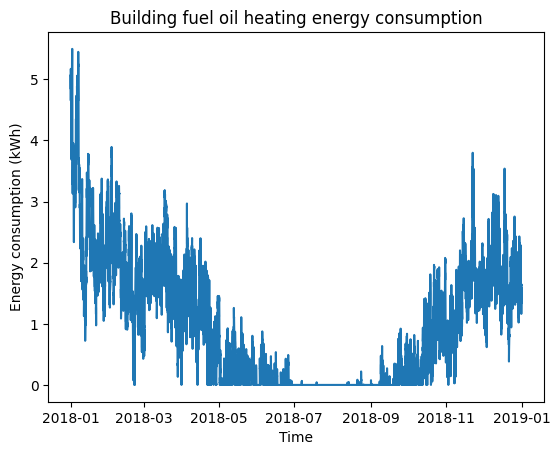

In [10]:
# Plot the building time series
plt.plot(data_dict[2])
plt.xlabel("Time")
plt.ylabel("Energy consumption (kWh)")
plt.title("Building fuel oil heating energy consumption")
plt.show()

In [11]:
# Remove global and diffuse horizontal radiation columns
weather_data = weather_data.drop(columns=["Global Horizontal Radiation [W/m2]", "Diffuse Horizontal Radiation [W/m2]"])

In [12]:
# Set timestamp as index
weather_data['date'] = pd.to_datetime(weather_data['date_time'])
weather_data = weather_data.set_index('date')
weather_data = weather_data.drop(columns=["date_time"])
weather_data = weather_data.resample('15T').ffill()


/var/folders/bw/4qyc6pj92bdb1bv22yhll2zw0000gn/T/ipykernel_9456/2130471163.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  weather_data = weather_data.resample('15T').ffill()


In [13]:
# Transform weather data into a list of dataframes, divided by column
weather_data_list = [weather_data[col] for col in weather_data.columns]

In [14]:
len(data_dict[1])

35037

In [15]:
weather_data.head()

,Dry Bulb Temperature [°C],Relative Humidity [%],Wind Speed [m/s],Wind Direction [Deg],Direct Normal Radiation [W/m2]
date,,,,,
2018-01-01 01:00:00,-17.2,47.00,7.2,310.0,0.0
2018-01-01 01:15:00,-17.2,47.00,7.2,310.0,0.0
2018-01-01 01:30:00,-17.2,47.00,7.2,310.0,0.0
2018-01-01 01:45:00,-17.2,47.00,7.2,310.0,0.0
2018-01-01 02:00:00,-17.8,46.83,6.7,300.0,0.0


In [16]:
# Normalize variables in weather data
weather_data = (weather_data - weather_data.mean()) / weather_data.std()
weather_data.head()

,Dry Bulb Temperature [°C],Relative Humidity [%],Wind Speed [m/s],Wind Direction [Deg],Direct Normal Radiation [W/m2]
date,,,,,
2018-01-01 01:00:00,-2.558615,-1.019759,1.713113,1.053406,-0.61346
2018-01-01 01:15:00,-2.558615,-1.019759,1.713113,1.053406,-0.61346
2018-01-01 01:30:00,-2.558615,-1.019759,1.713113,1.053406,-0.61346
2018-01-01 01:45:00,-2.558615,-1.019759,1.713113,1.053406,-0.61346
2018-01-01 02:00:00,-2.614027,-1.027965,1.497432,0.948277,-0.61346


# Train models without exogenous variables

In [17]:
# Train ARIMA model
# Supress warnings
import warnings
warnings.filterwarnings("ignore")


models = {}
for num in data_dict:
    print(f"Training model for building {num}")
    
    # Select endog and exog variables
    endog = data_dict[num]

    # Train ARIMA model
    model = ARIMA(endog=endog, order=(2, 1, 0))

    model_fit = model.fit()
    models[num] = model_fit

Training model for building 1
Training model for building 2
Training model for building 3
Training model for building 4
Training model for building 5


In [18]:
for num in models:
    print(f"Building {num}")
    print(models[num].summary())

Building 1
                                          SARIMAX Results                                          
Dep. Variable:     out.fuel_oil.heating.energy_consumption   No. Observations:                35037
Model:                                      ARIMA(2, 1, 0)   Log Likelihood               68096.830
Date:                                     Thu, 13 Mar 2025   AIC                        -136187.659
Time:                                             10:42:33   BIC                        -136162.267
Sample:                                         01-01-2018   HQIC                       -136179.572
                                              - 01-01-2019                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5025      0.00

In [19]:
# Print out model parameters
for num in models:
    print(f"Model for building {num}")
    print(models[num].params)

Model for building 1
ar.L1     0.502497
ar.L2     0.082271
sigma2    0.001200
dtype: float64
Model for building 2
ar.L1    -0.177999
ar.L2     0.209201
sigma2    0.003709
dtype: float64
Model for building 3
ar.L1     0.151527
ar.L2     0.058087
sigma2    0.000661
dtype: float64
Model for building 4
ar.L1     0.416937
ar.L2     0.159983
sigma2    0.001777
dtype: float64
Model for building 5
ar.L1    -0.167766
ar.L2     0.100265
sigma2    0.000831
dtype: float64


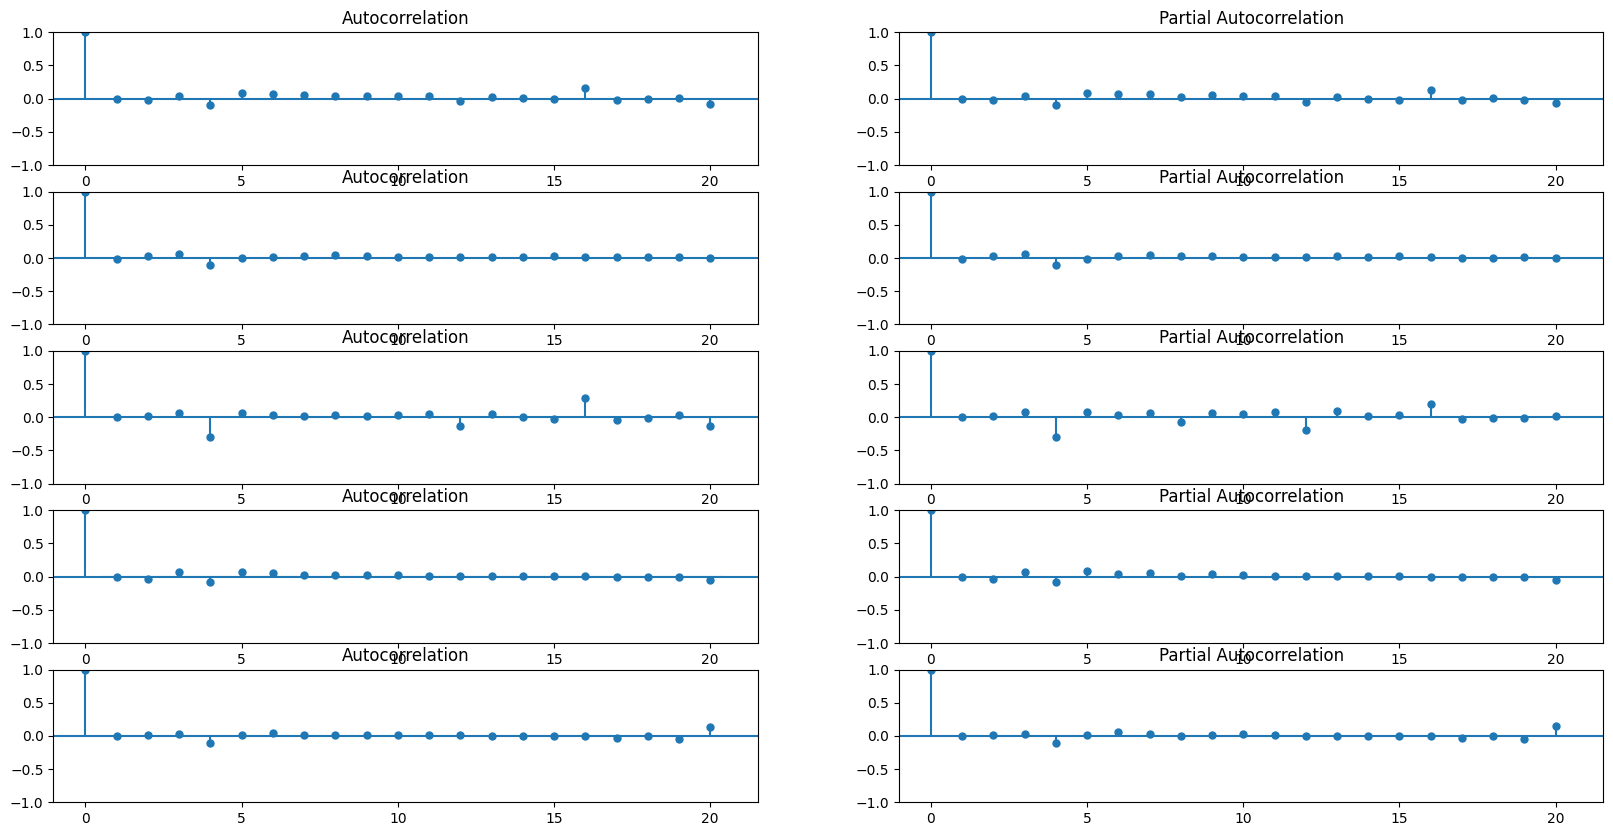

In [20]:
# ACF model graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(5, 2, figsize=(20, 10))

for num in models:
    plot_acf(models[num].resid, lags=20, ax=ax[num-1, 0])
    plot_pacf(models[num].resid, lags=20, ax=ax[num-1, 1])
    

# integrate the time series
plt.show()

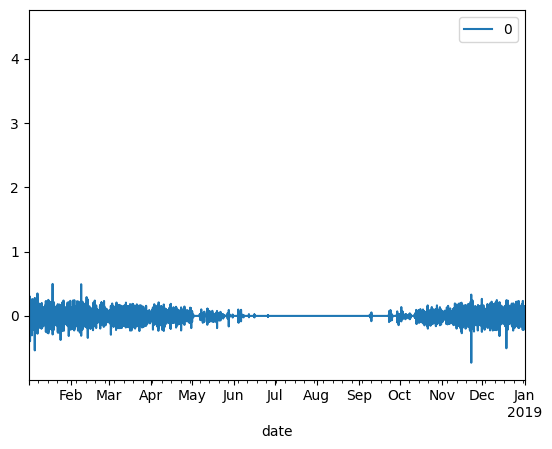

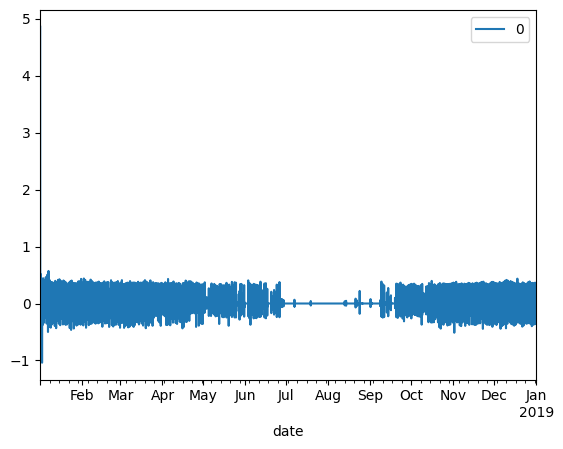

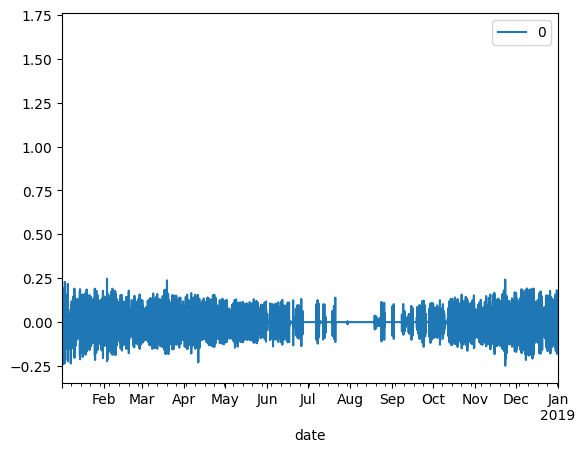

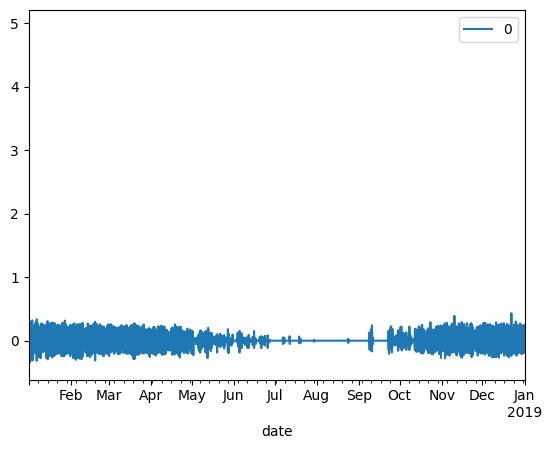

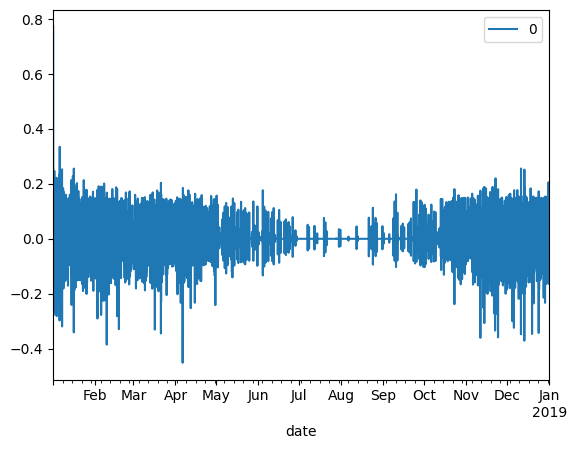

In [21]:
for num in models:
    model_fit = models[num]
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()

## Prediction without exogenous variables

In [22]:
# Predict
predictions = {}
for num in models:
    model_fit = models[num]
    predictions[num] = model_fit.predict(start=0, end=(len(data_dict[num]) - 1), exog=weather_data)

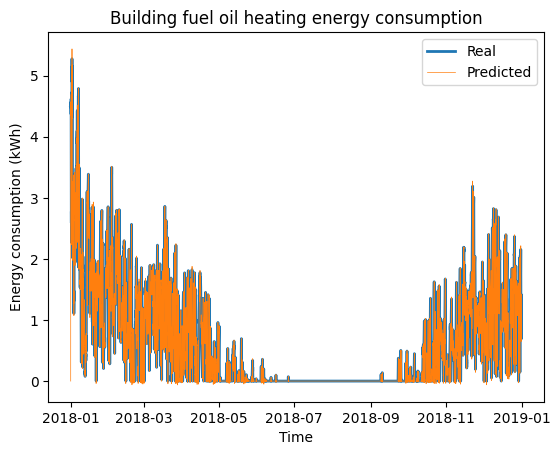

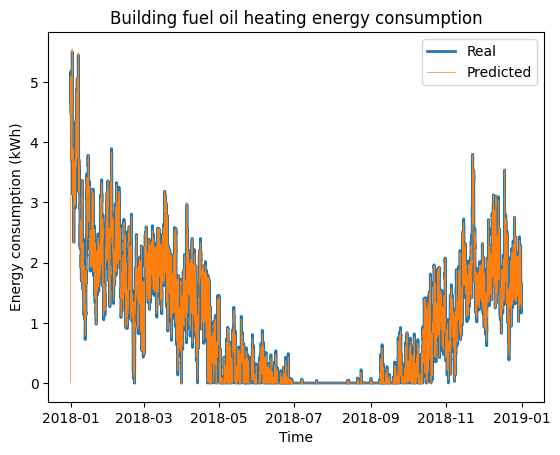

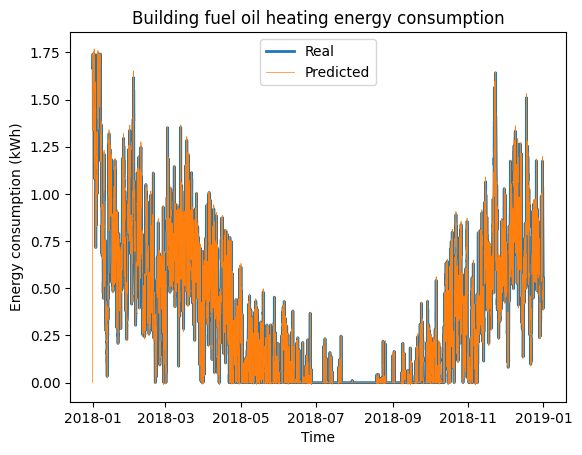

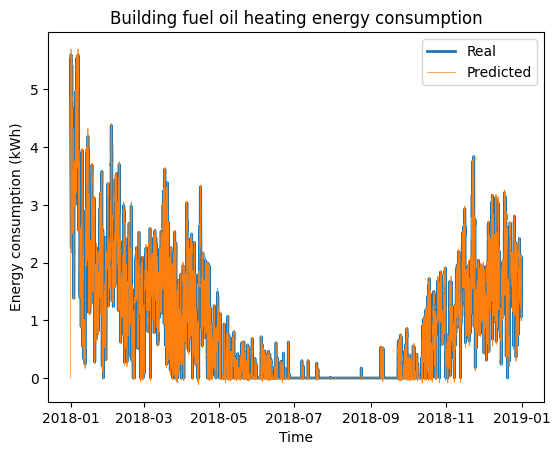

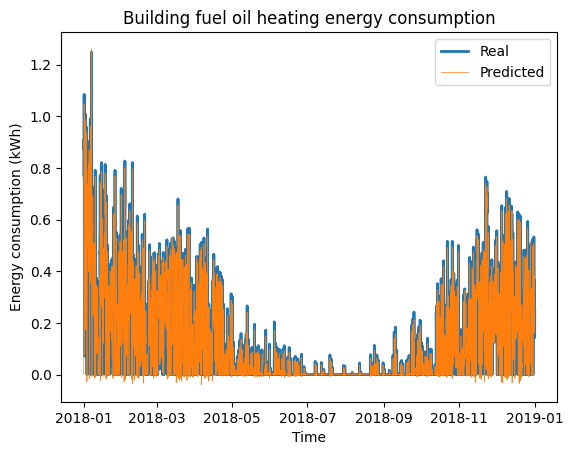

In [23]:
# Plot forecast, each graph with different widths
for num in models:
    plt.plot(data_dict[num], lw=2)
    plt.plot(predictions[num], lw=0.5)
    plt.xlabel("Time")
    plt.ylabel("Energy consumption (kWh)")
    plt.title("Building fuel oil heating energy consumption")
    plt.legend(["Real", "Predicted"])
    plt.show()

# Train models with exogenous variables

In [24]:
# Train ARIMA model
# Supress warnings
import warnings
warnings.filterwarnings("ignore")


models_exog = {}
for num in data_dict:
    print(f"Training model for building {num}")
    
    # Select endog and exog variables
    endog = data_dict[num]
    exog = weather_data

    # Train ARIMA model
    model = ARIMA(endog=endog, exog=exog, order=(1, 0, 0))

    model_fit = model.fit()
    models_exog[num] = model_fit

Training model for building 1
Training model for building 2
Training model for building 3
Training model for building 4
Training model for building 5


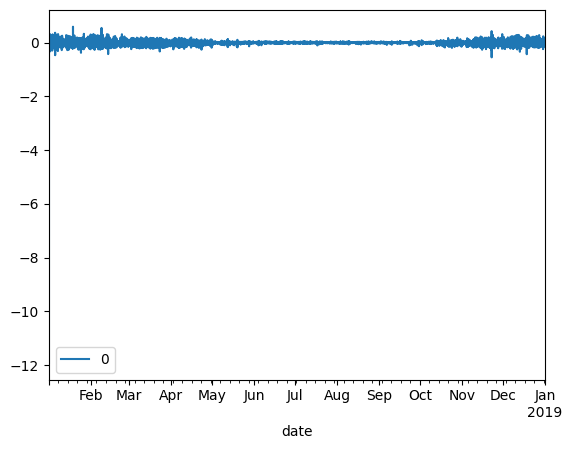

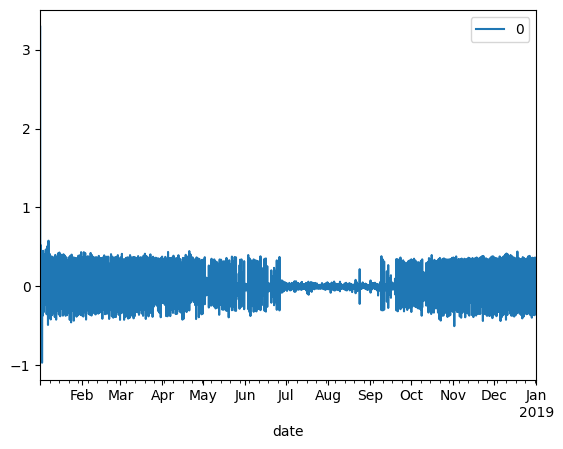

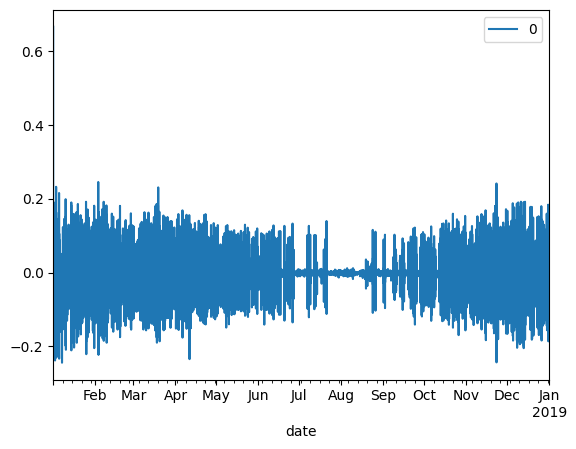

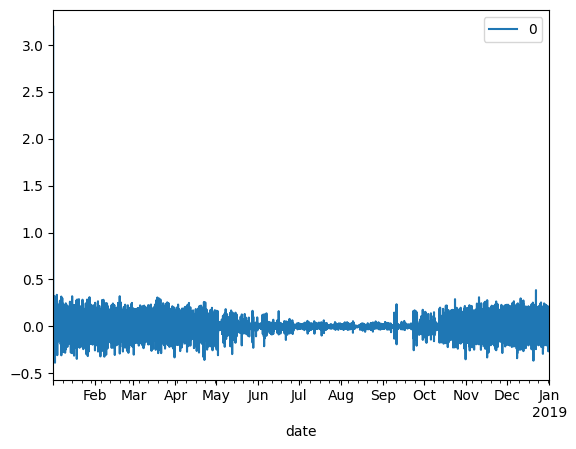

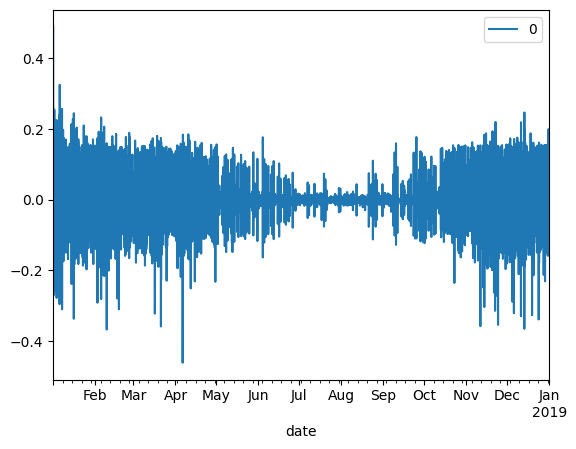

In [25]:
for num in models_exog:
    model_fit = models_exog[num]
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()

## Predictions with exogenous variables

In [26]:
# Predict
predictions_exog = {}
for num in models_exog:
    model_fit = models_exog[num]
    predictions_exog[num] = model_fit.predict(start=0, end=(len(data_dict[num]) - 1), exog=weather_data)

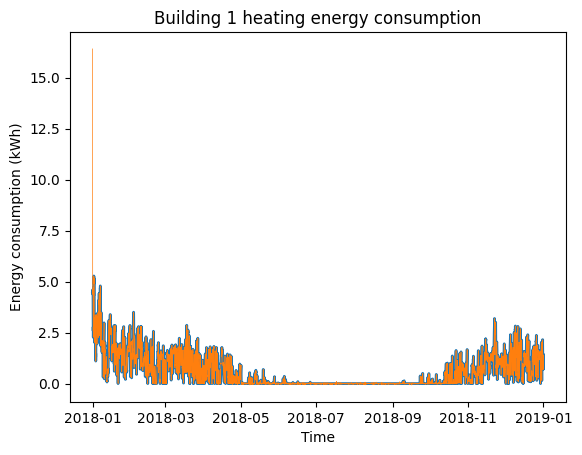

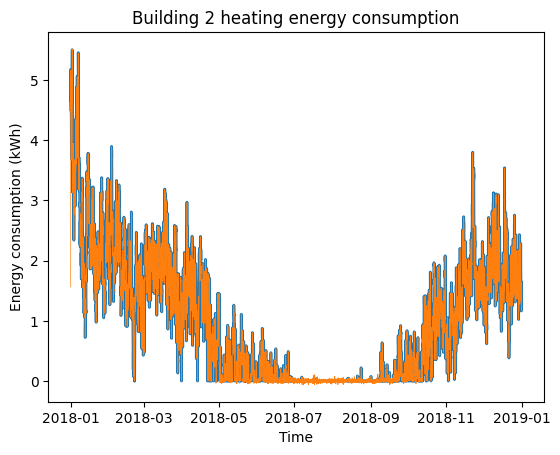

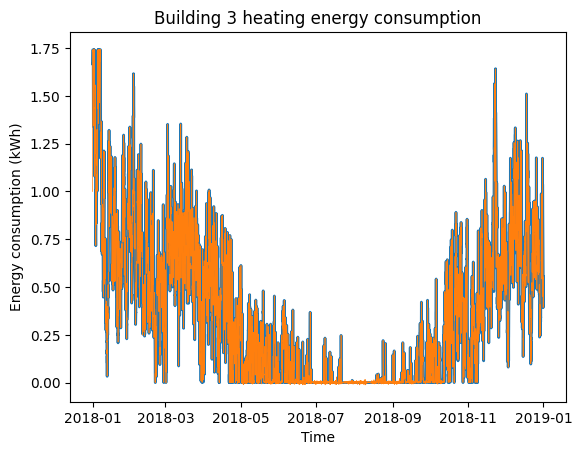

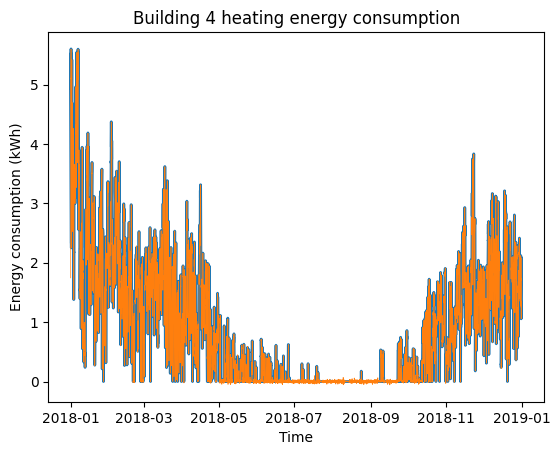

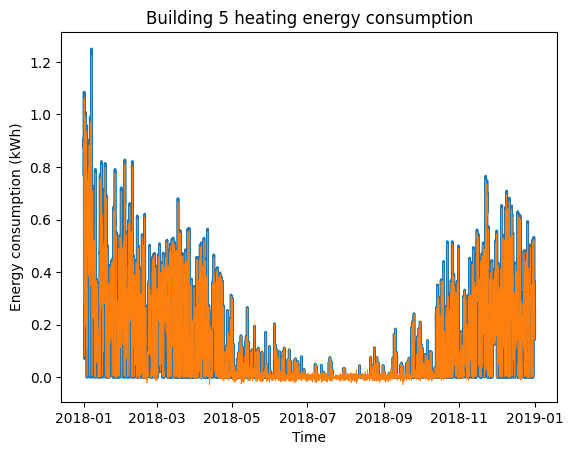

In [27]:
# Plot forecast, each graph with different widths
for num in models_exog:
    plt.plot(data_dict[num], lw=2)
    plt.plot(predictions_exog[num], lw=0.5)
    plt.xlabel("Time")
    plt.ylabel("Energy consumption (kWh)")
    plt.title(f"Building {num} heating energy consumption")
    plt.show()

# Compare predictions

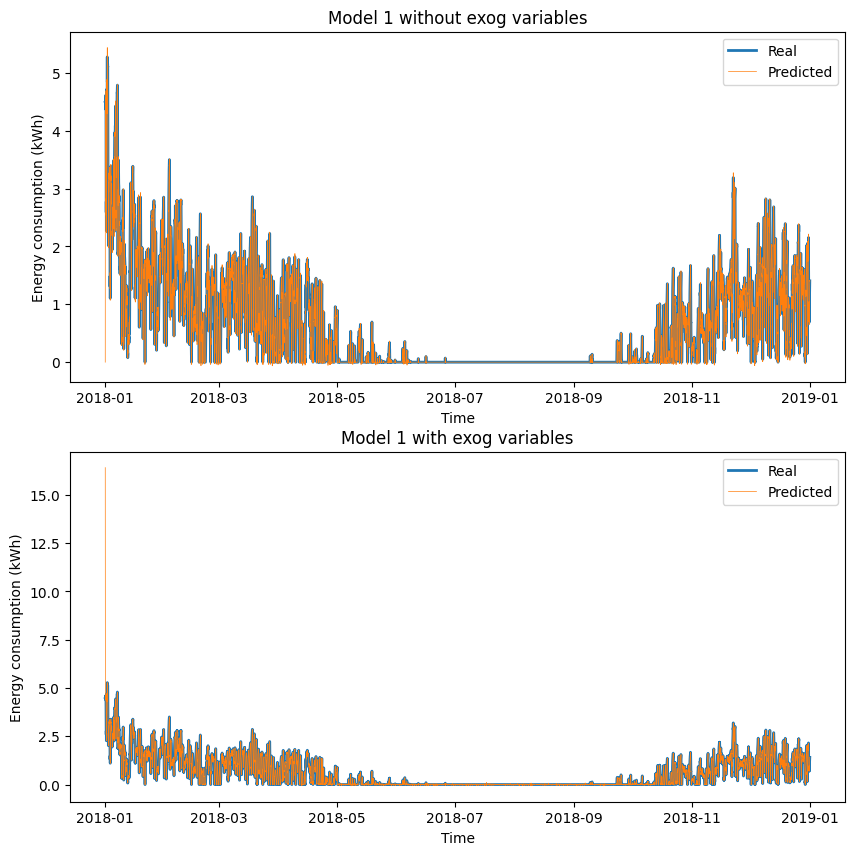

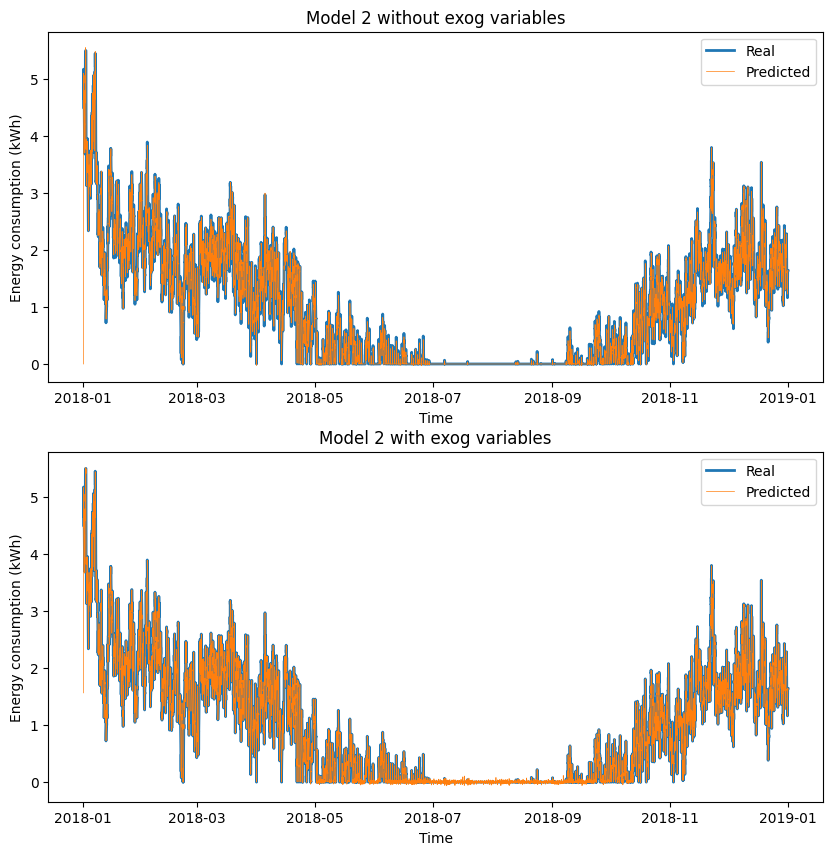

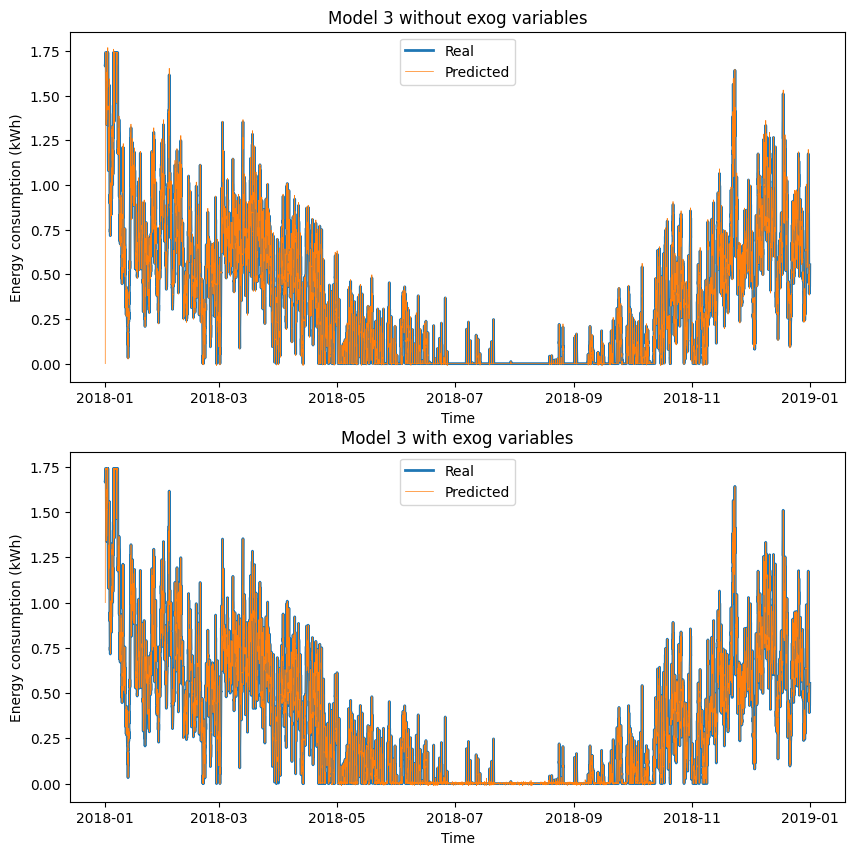

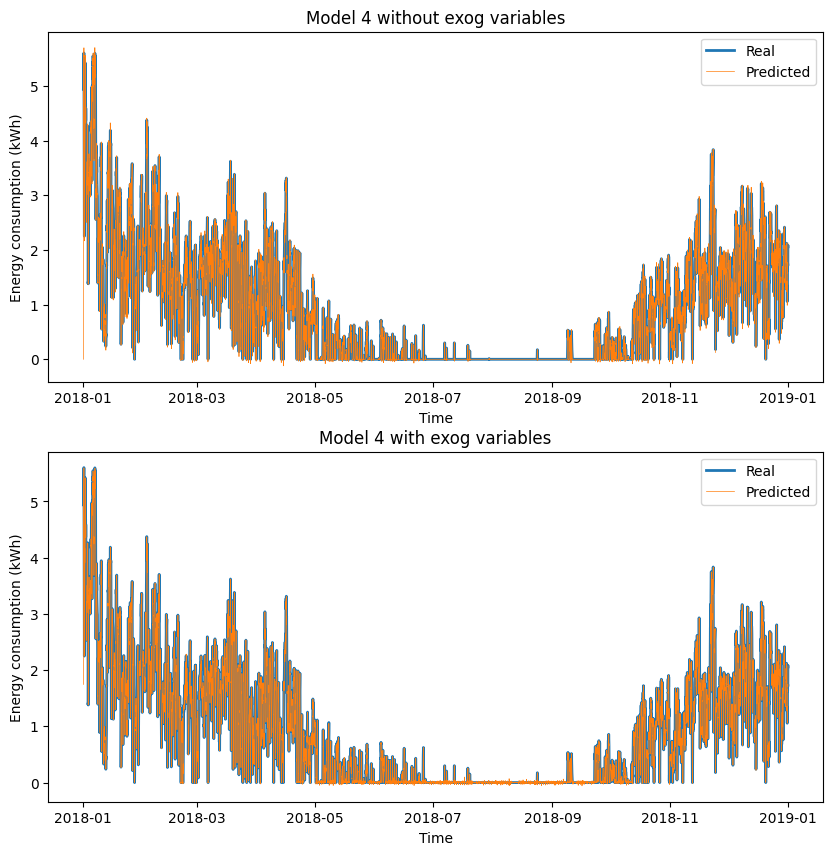

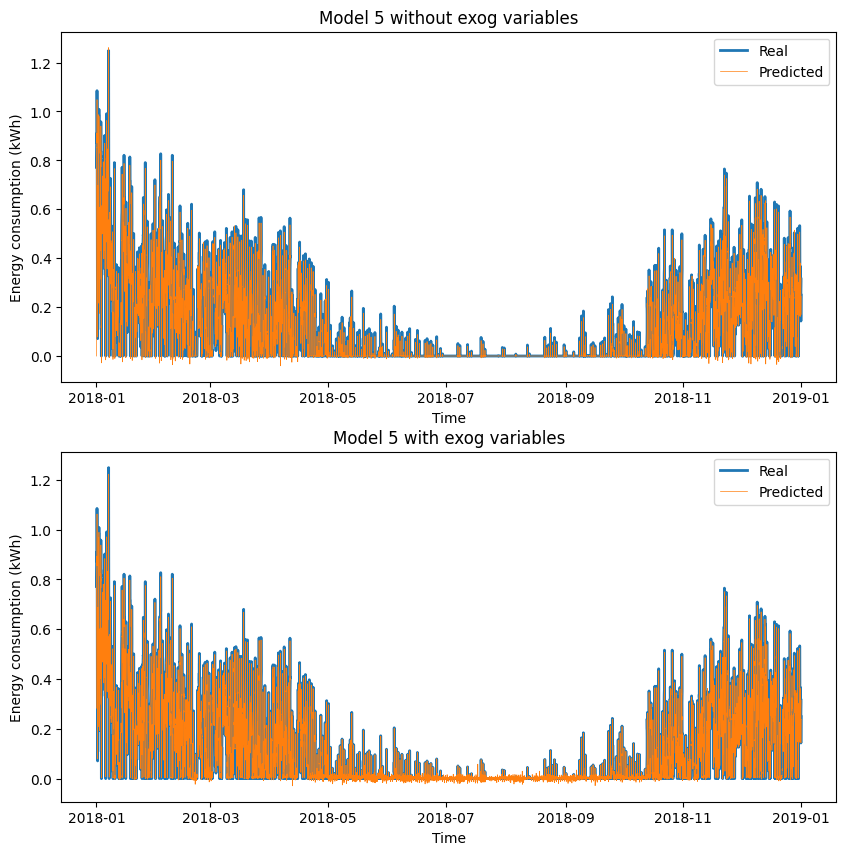

In [28]:
# Plot together each model prediction with and without exog variables
for num in models:
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(211)
    ax.plot(data_dict[num], lw=2)
    ax.plot(predictions[num], lw=0.5)
    ax.set_title(f"Model {num} without exog variables")
    ax.set_xlabel("Time")
    ax.set_ylabel("Energy consumption (kWh)")
    ax.legend(["Real", "Predicted"])

    ax = fig.add_subplot(212)
    ax.plot(data_dict[num], lw=2)
    ax.plot(predictions_exog[num], lw=0.5)
    ax.set_title(f"Model {num} with exog variables")
    ax.set_xlabel("Time")
    ax.set_ylabel("Energy consumption (kWh)")
    ax.legend(["Real", "Predicted"])
    plt.show()

In [ ]:
print(models[1].summary())

In [ ]:
print(models_exog[1].summary())

# Cross validation with exogenous variables

In [29]:
# Initialize dictionary to store results
cv_models = {}
for num in models:
    cv_models[num] = []

cv_results = {}
for num in models:
    cv_results[num] = []

best_models = {}
best_params = {}

In [30]:
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

In [31]:
# Cross validate
for num in models:
    best_aic = float("inf")
    print(f"Cross validating model for building {num}")

    i = 1
    for p, d, q in itertools.product(p_values, d_values, q_values):
        print(f"\tIteration {i}/{len(p_values) * len(d_values) * len(q_values)}       ", end="\r")
        try:
            model = ARIMA(endog=data_dict[num], exog=weather_data, order=(p, d, q))
            model_fit = model.fit()
            cv_models[num].append(model_fit)
            cv_results[num].append(model_fit.aic)
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_model = model_fit
                best_models[num] = model_fit
                best_params[num] = (p, d, q)
        except:
            cv_models[num].append(None)
            cv_results[num].append(None)
        i += 1

Cross validating model for building 1
Cross validating model for building 2
Cross validating model for building 3
Cross validating model for building 4
Cross validating model for building 5


In [ ]:
print(best_params)

In [ ]:
weather_data.head()

In [ ]:
for num in best_models:
    print(best_models[num].summary())

## Cross validation predictions

In [32]:
# Predict
best_predictions = {}
for num in best_models:
    model_fit = best_models[num]
    best_predictions[num] = model_fit.predict(start=0, end=(len(data_dict[num]) - 1), exog=weather_data)

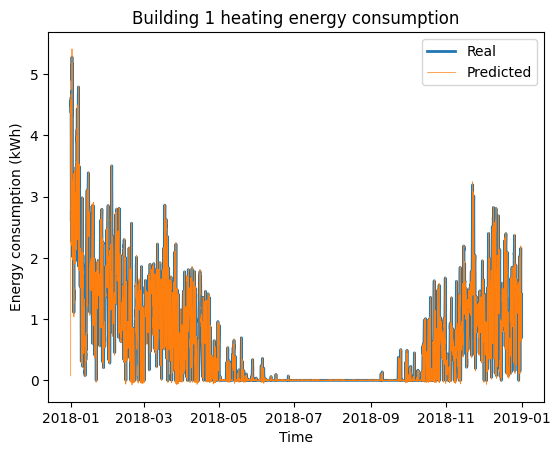

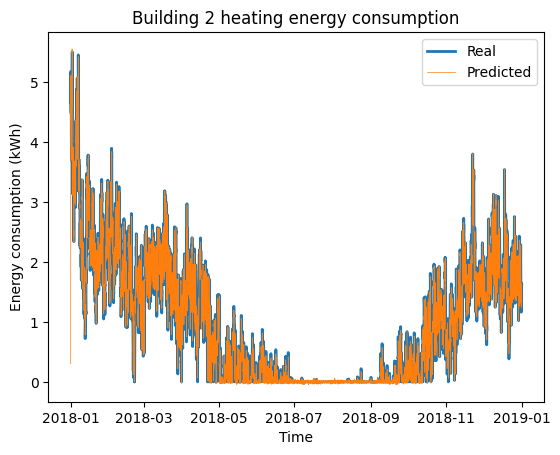

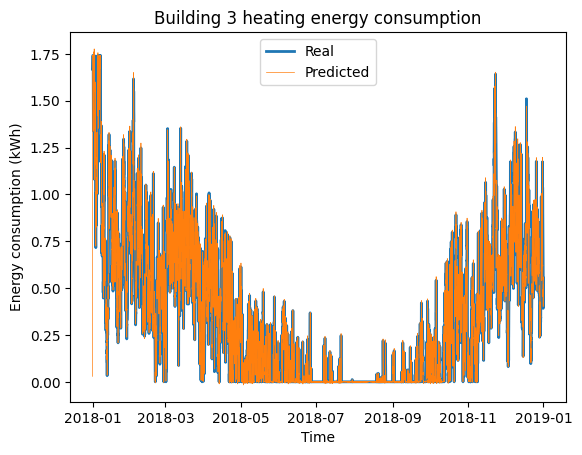

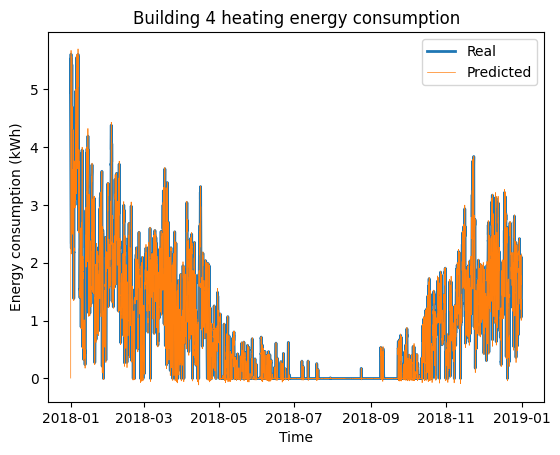

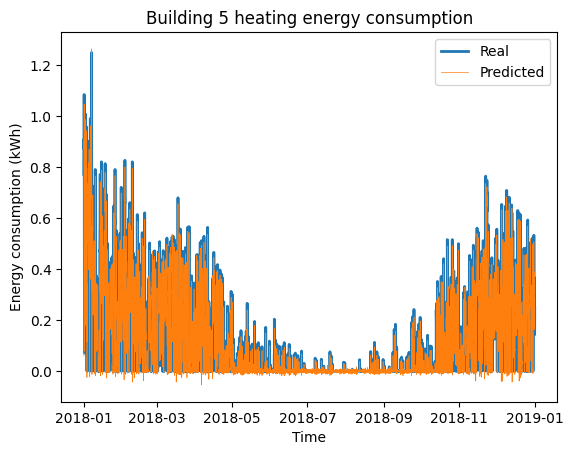

In [33]:
# Plot forecast, each graph with different widths
for num in best_models:
    plt.plot(data_dict[num], lw=2)
    plt.plot(best_predictions[num], lw=0.5)
    plt.xlabel("Time")
    plt.ylabel("Energy consumption (kWh)")
    plt.title(f"Building {num} heating energy consumption")
    plt.legend(["Real", "Predicted"])
    plt.show()

# Compare best exog model with no exog models

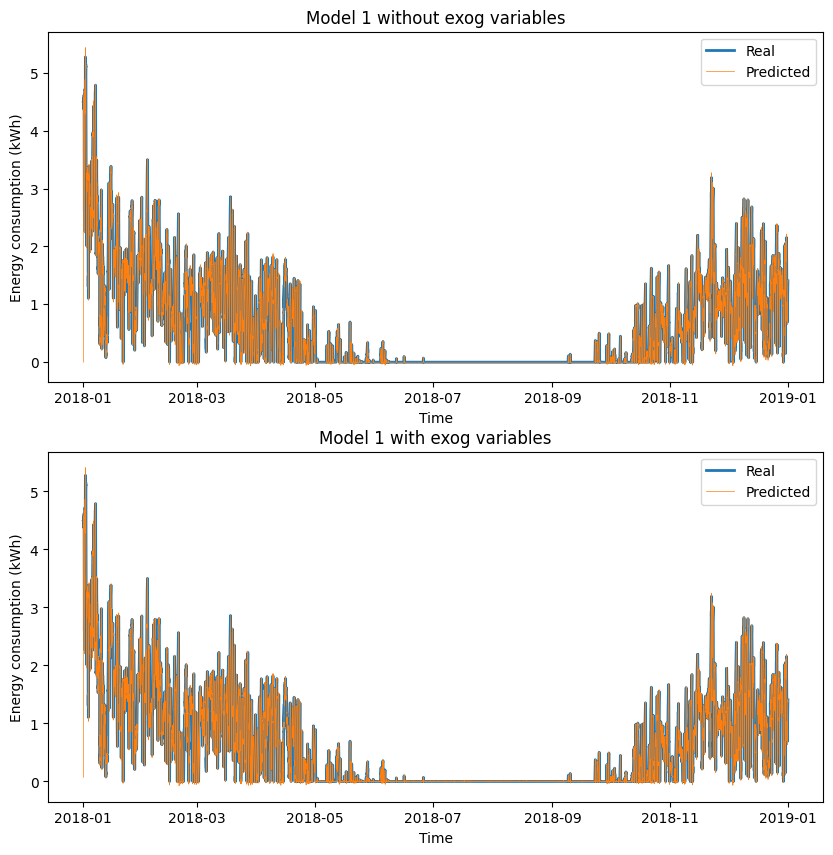

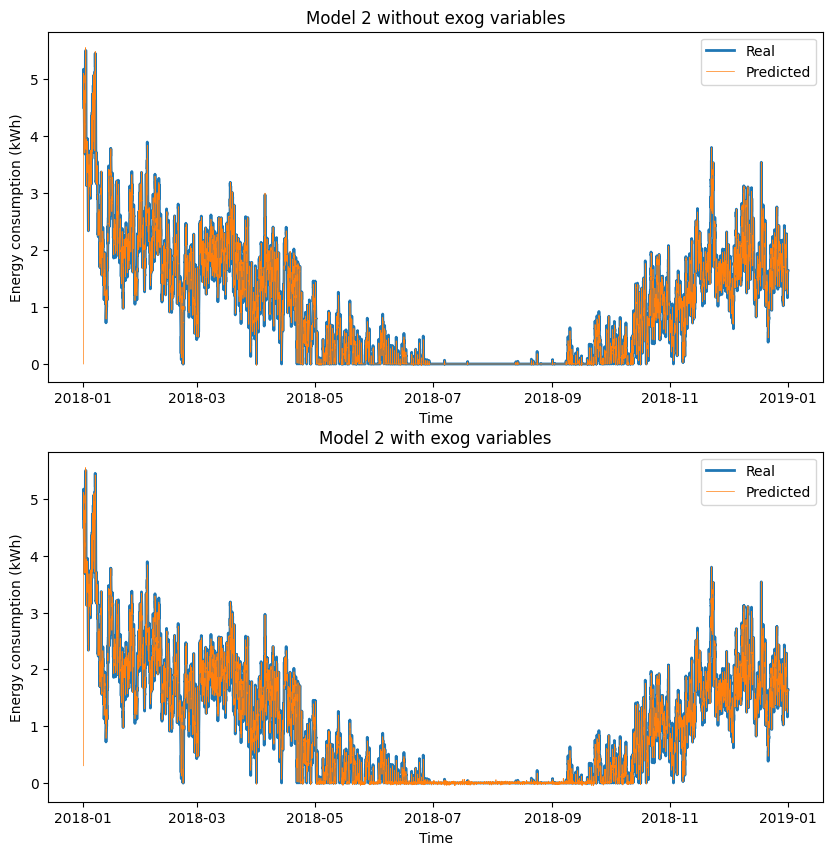

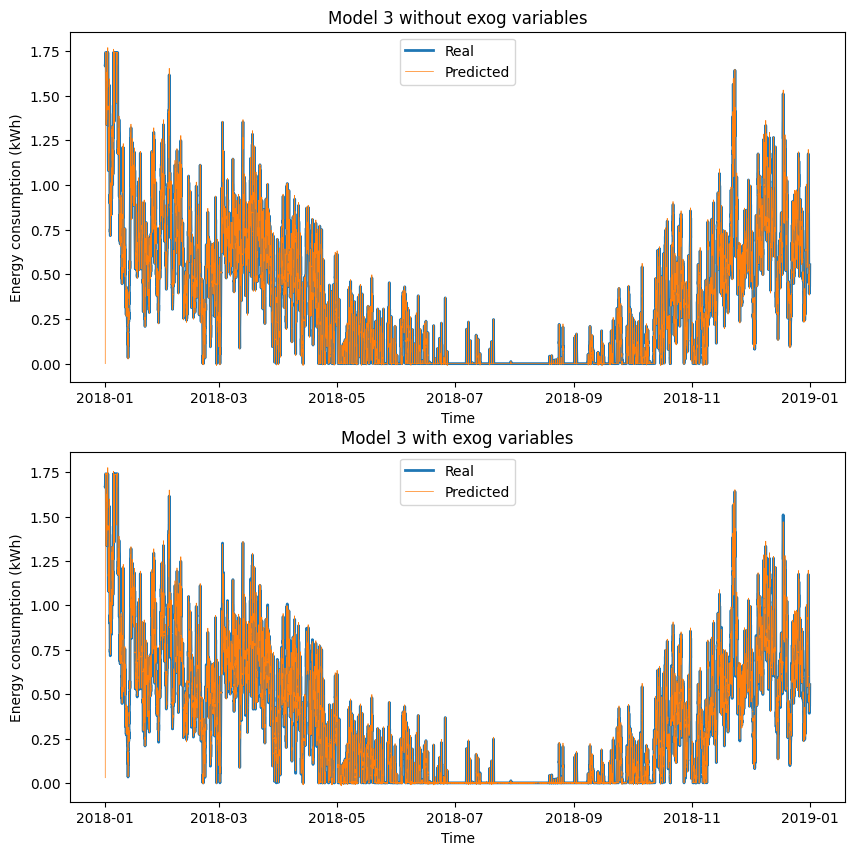

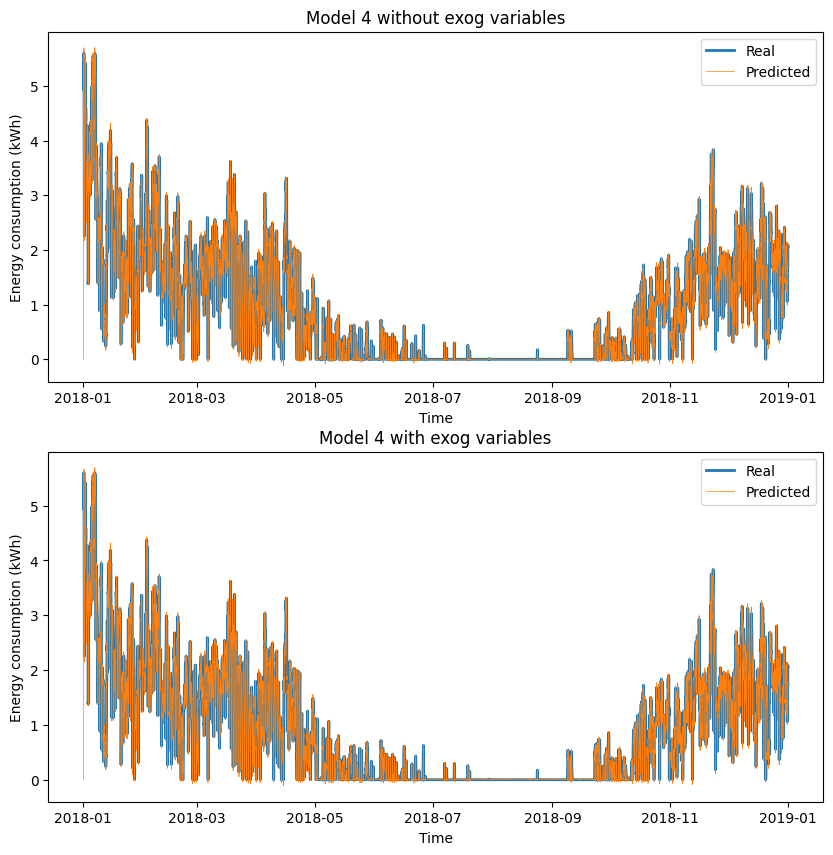

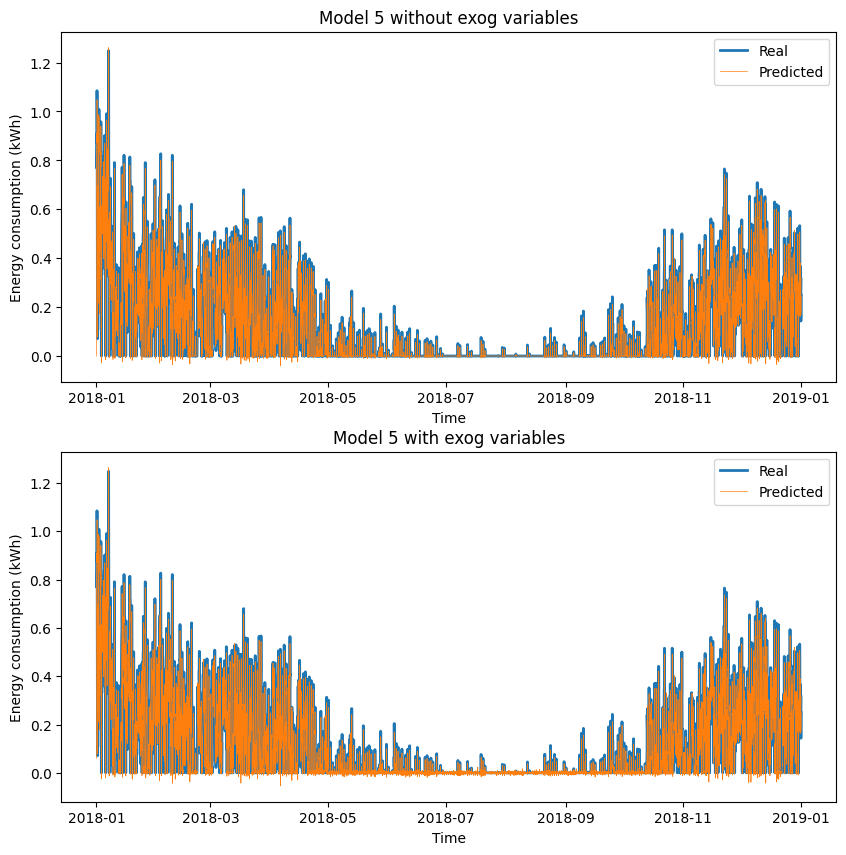

In [34]:
# Plot together each model prediction with and without exog variables
for num in models:
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(211)
    ax.plot(data_dict[num], lw=2)
    ax.plot(predictions[num], lw=0.5)
    ax.set_title(f"Model {num} without exog variables")
    ax.set_xlabel("Time")
    ax.set_ylabel("Energy consumption (kWh)")
    ax.legend(["Real", "Predicted"])

    ax = fig.add_subplot(212)
    ax.plot(data_dict[num], lw=2)
    ax.plot(best_predictions[num], lw=0.5)
    ax.set_title(f"Model {num} with exog variables")
    ax.set_xlabel("Time")
    ax.set_ylabel("Energy consumption (kWh)")
    ax.legend(["Real", "Predicted"])
    plt.show()

In [ ]:
# Compare models RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

best_rmse = {}
rmse = {}
for num in best_models:
    best_rmse[num] = sqrt(mean_squared_error(data_dict[num], best_predictions[num]))
    rmse[num] = sqrt(mean_squared_error(data_dict[num], predictions[num]))

print(best_rmse)
print(rmse)